#Final Data cleaned
### population and CO2 emission
### temperature

####  1- upload data

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
df1= pd.read_csv('../my folder/1. co2_population_cleaned.csv')
df2= pd.read_csv('../my folder/2- temperature _cleaned.csv')



# Clean the datasets
# 1. Remove non-country names and rows containing 'World'
non_country_names = ["World", "Africa Eastern and Southern", "Africa Western and Central"]
df1 = df1[~df1['country'].isin(non_country_names)]
df2 = df2[~df2['country'].isin(non_country_names)]

# 2. Standardize country names by trimming and converting to lowercase
df1['country'] = df1['country'].str.strip().str.lower()
df2['country'] = df2['country'].str.strip().str.lower()

# 3. Rename 'temperature_change' column in df2 for consistency
df2 = df2.rename(columns={'temperature_change': 'temperature'})

# 4. Keep only matching country names in both datasets
matching_countries = set(df1['country']).intersection(set(df2['country']))
df1 = df1[df1['country'].isin(matching_countries)]
df2 = df2[df2['country'].isin(matching_countries)]

# Merge the cleaned datasets on 'country' and 'year'
df3 = pd.merge(df1, df2, on=['country', 'year'], how='inner')

# Display the merged dataframe
print(df3.head())



In [20]:
 #Add new columns
# Define industrial countries and regions (this is a basic list, adjust as needed)
industrial_countries = {'united states', 'canada', 'japan', 'germany', 'france', 'united kingdom', 'italy', 'australia', 'south korea'}
global_north = {'united states', 'canada', 'japan', 'germany', 'france', 'united kingdom', 'italy', 'australia', 'new zealand', 'south korea', 'norway', 'sweden', 'denmark', 'finland', 'switzerland', 'austria', 'belgium', 'netherlands', 'luxembourg'}

# Add 'industrial_level' column
df3['industrial_level'] = df3['country'].apply(lambda x: 'industrial' if x in industrial_countries else 'no_industrial')

# Add 'region' column
df3['region'] = df3['country'].apply(lambda x: 'global north' if x in global_north else 'global south')



# 3. Ensure correct data types
df3['year'] = pd.to_numeric(df3['year'], errors='coerce')
df3['population'] = pd.to_numeric(df3['population'], errors='coerce')
df3['co2_emission'] = pd.to_numeric(df3['co2_emission'], errors='coerce')
df3['temperature'] = pd.to_numeric(df3['temperature'], errors='coerce')

df3

,country,year,population,co2_emission,temperature,industrial_level,region
0,aruba,1999,86867.0,810.407000,0.216,no_industrial,global south
1,angola,1999,15870753.0,17610.000000,0.591,no_industrial,global south
2,albania,1999,3108778.0,2970.000000,0.722,no_industrial,global south
3,andorra,1999,65655.0,510.000000,1.020,no_industrial,global south
4,united arab emirates,1999,3097563.0,85680.000000,1.351,no_industrial,global south
...,...,...,...,...,...,...,...
3892,vanuatu,2019,304404.0,209.999993,0.803,no_industrial,global south
3893,samoa,2019,211905.0,300.000012,0.828,no_industrial,global south
3894,south africa,2019,58087055.0,439640.014648,1.752,no_industrial,global south
3895,zambia,2019,18380477.0,6800.000191,1.295,no_industrial,global south


                country  co2_emission
177       united states  1.121998e+08
141  russian federation  3.391844e+07
78                india  3.358091e+07
85                japan  2.484001e+07
64              germany  1.630648e+07
32               canada  1.144717e+07
91          korea, rep.  1.131226e+07
176      united kingdom  9.934830e+06
111              mexico  9.247570e+06
79            indonesia  8.686160e+06
144        saudi arabia  8.564470e+06
83                italy  8.421020e+06
151        south africa  8.239240e+06
23               brazil  8.160730e+06
8             australia  7.844470e+06
59               france  7.283650e+06
137              poland  6.340180e+06
170              turkey  6.171930e+06
153               spain  6.056560e+06
174             ukraine  5.574720e+06


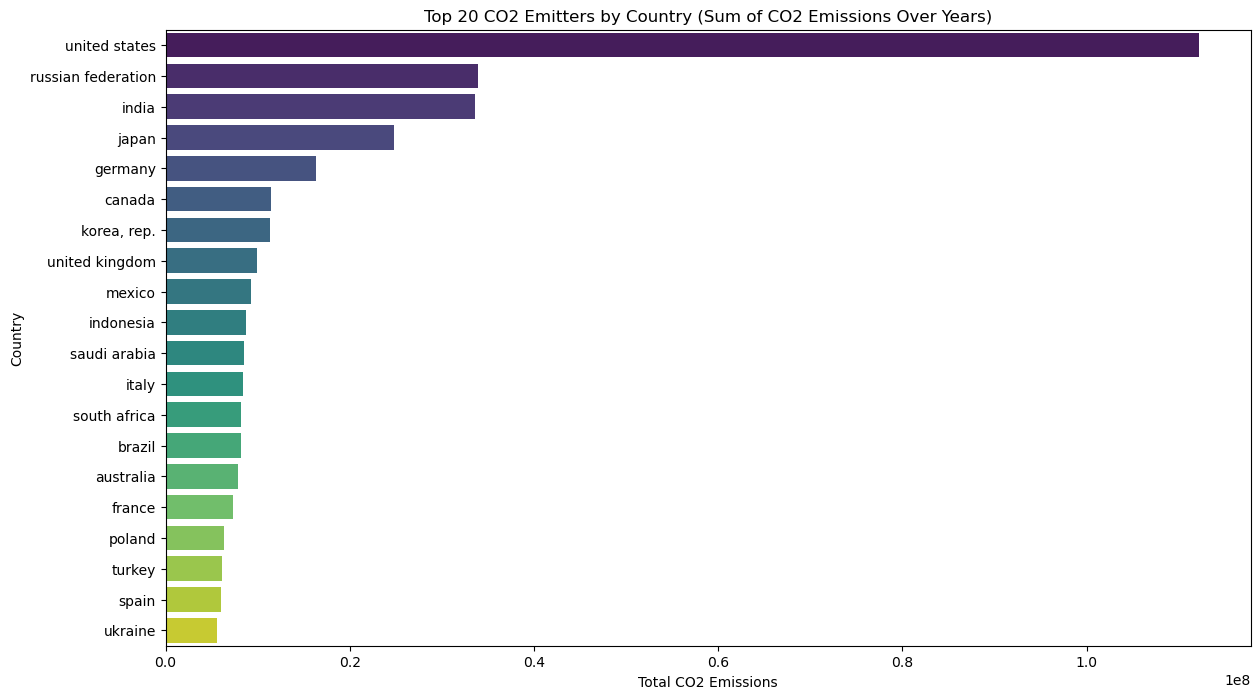

In [26]:
# Aggregate CO2 emissions by country
total_co2_emissions = df3.groupby('country')['co2_emission'].sum().reset_index()

# Sort the countries by total CO2 emissions in descending order
total_co2_emissions = total_co2_emissions.sort_values(by='co2_emission', ascending=False)

# Select the top 20 countries
top_20_emitters = total_co2_emissions.head(20)

# Display the top 20 CO2 emitters
print(top_20_emitters)

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(x='co2_emission', y='country', data=top_20_emitters, palette='viridis')
plt.title('Top 20 CO2 Emitters by Country (Sum of CO2 Emissions Over Years)')
plt.xlabel('Total CO2 Emissions')
plt.ylabel('Country')
plt.show()


                country  temperature
15              belarus       34.584
53              estonia       34.518
58              finland       33.688
95               latvia       33.439
9               austria       33.277
141  russian federation       33.065
101           lithuania       32.698
160              sweden       31.376
29           cabo verde       31.327
100       liechtenstein       31.191


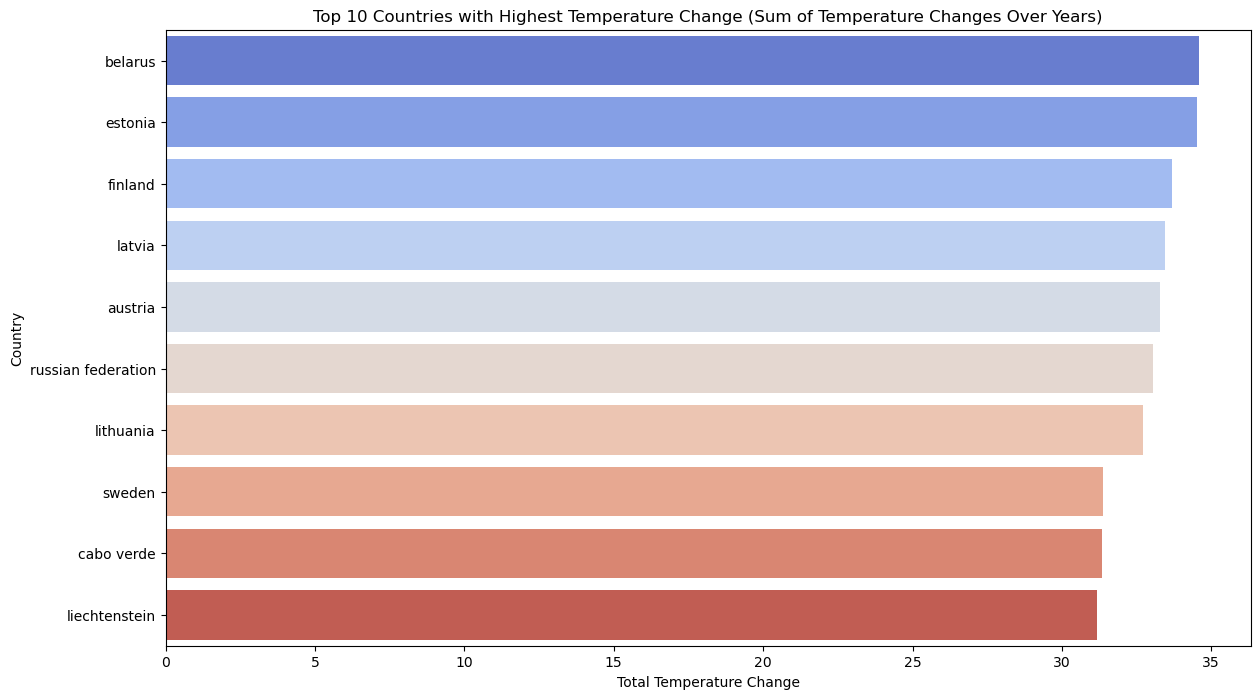

In [27]:
# Aggregate temperature changes by country
total_temp_change = df3.groupby('country')['temperature'].sum().reset_index()

# Sort the countries by total temperature change in descending order
total_temp_change = total_temp_change.sort_values(by='temperature', ascending=False)

# Select the top 10 countries
top_10_temp_change = total_temp_change.head(10)

# Display the top 10 countries with the highest temperature change
print(top_10_temp_change)

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(x='temperature', y='country', data=top_10_temp_change, palette='coolwarm')
plt.title('Top 10 Countries with Highest Temperature Change (Sum of Temperature Changes Over Years)')
plt.xlabel('Total Temperature Change')
plt.ylabel('Country')
plt.show()

    year  co2_per_capita
0   1999        0.004338
1   2000        0.004579
2   2001        0.004566
3   2002        0.004619
4   2003        0.004760
5   2004        0.004856
6   2005        0.004993
7   2006        0.005032
8   2007        0.004954
9   2008        0.004952
10  2009        0.005099
11  2010        0.004868
12  2011        0.004796
13  2012        0.004848
14  2013        0.004661
15  2014        0.004574
16  2015        0.004531
17  2016        0.004556
18  2017        0.004226
19  2018        0.004249
20  2019        0.004155


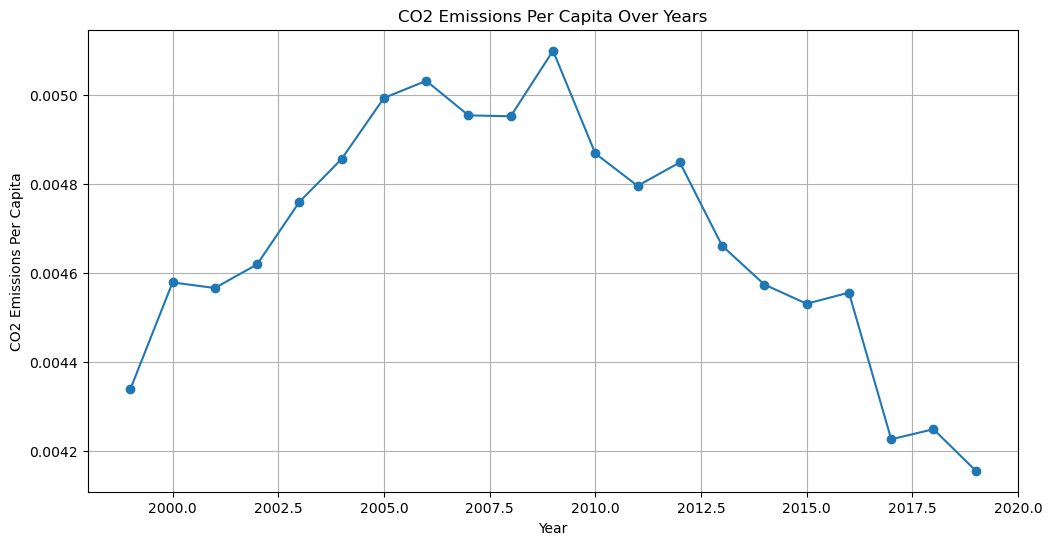

In [28]:
# Calculate CO2 emissions per capita
df3['co2_per_capita'] = df3['co2_emission'] / df3['population']

# Aggregate CO2 emissions per capita by year
co2_per_capita_by_year = df3.groupby('year')['co2_per_capita'].mean().reset_index()

# Display the CO2 emissions per capita by year
print(co2_per_capita_by_year)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(co2_per_capita_by_year['year'], co2_per_capita_by_year['co2_per_capita'], marker='o', linestyle='-')
plt.title('CO2 Emissions Per Capita Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.grid(True)
plt.show()


# Aggregation and Analysis

###  Hypothesis 1: Countries in the Global North produce more CO2 emissions


To test the hypothesis that countries in the Global North produce more CO2 emissions than those in the Global South, we can follow these steps:

Aggregate CO2 emissions by region (Global North vs. Global South).

Perform a statistical test to see if the difference in CO2 emissions between the two regions is significant.

Visualize the results.


T-statistic: 7.913416731470516
P-value: 2.810884086226259e-14


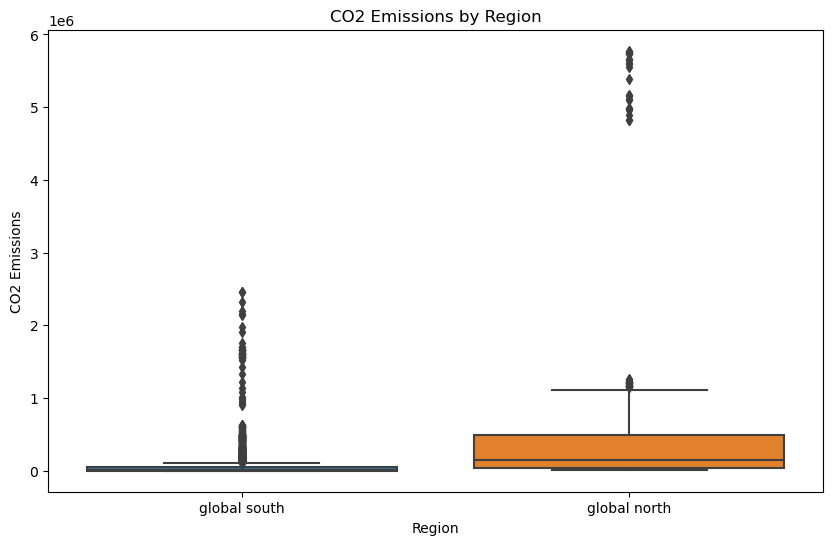

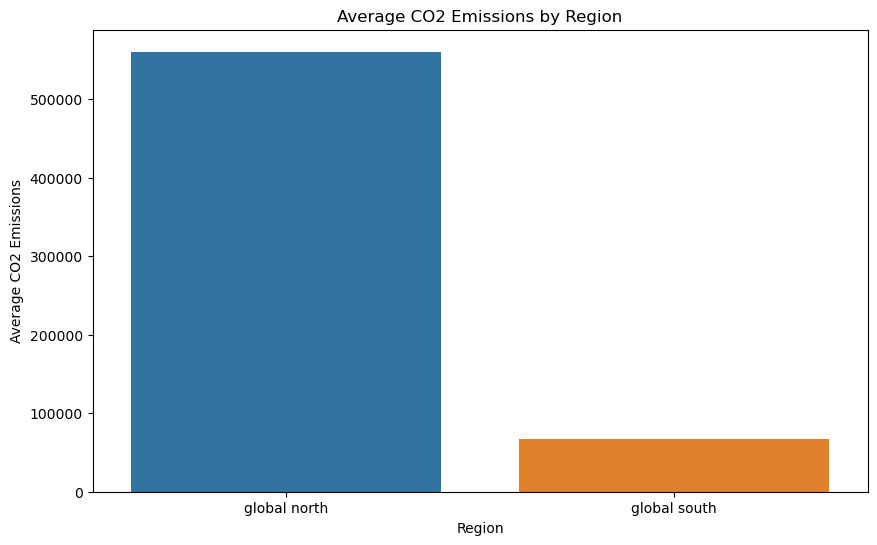

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Hypothesis Testing
# Aggregate CO2 emissions by region
co2_by_region = df3.groupby('region')['co2_emission'].mean()

# Perform t-test to compare CO2 emissions between Global North and Global South
global_north_emissions = df3[df3['region'] == 'global north']['co2_emission']
global_south_emissions = df3[df3['region'] == 'global south']['co2_emission']

t_stat, p_value = ttest_ind(global_north_emissions, global_south_emissions, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='co2_emission', data=df3)
plt.title('CO2 Emissions by Region')
plt.xlabel('Region')
plt.ylabel('CO2 Emissions')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=co2_by_region.index, y=co2_by_region.values)
plt.title('Average CO2 Emissions by Region')
plt.xlabel('Region')
plt.ylabel('Average CO2 Emissions')
plt.show()

### Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise
##### Compare top CO2 emitters' temperature changes

To test the hypothesis that countries that produce the most CO2 emissions are the least impacted by temperature rise, we need to:

Identify the top CO2 emitting countries.

Compare their temperature changes to the rest of the countries.

Perform a statistical test to see if the difference is significant.

Visualize the results.


T-statistic: 6.442318024869311
P-value: 1.5805266540336867e-10


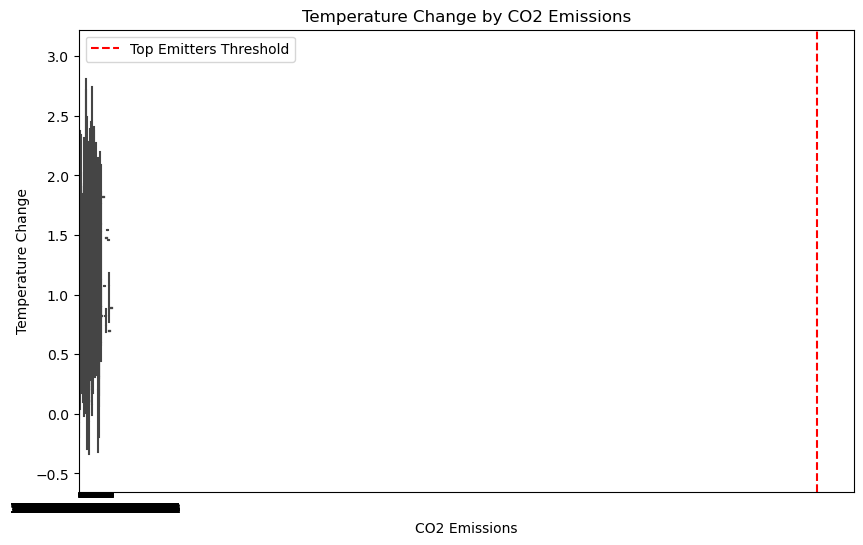

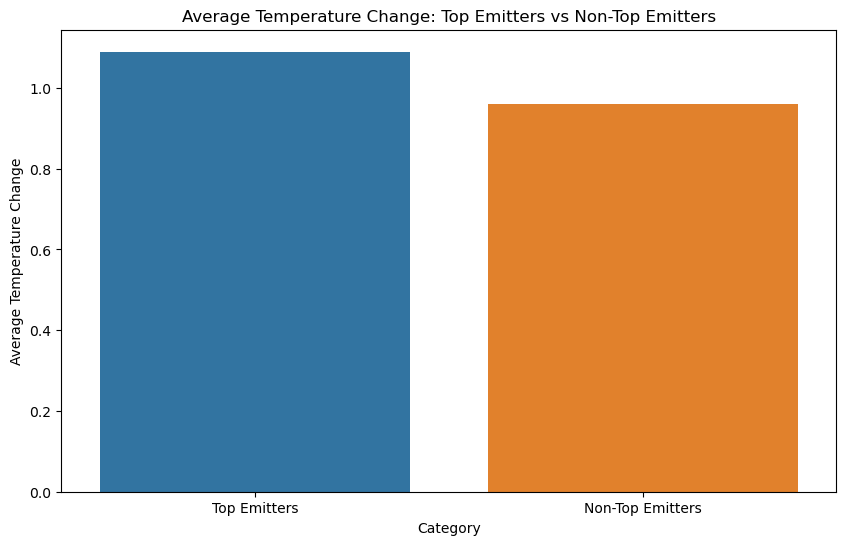

In [24]:
# Hypothesis Testing
# Identify the top CO2 emitting countries
top_emitters_threshold = df3['co2_emission'].quantile(0.75)
top_emitters = df3[df3['co2_emission'] >= top_emitters_threshold]
non_top_emitters = df3[df3['co2_emission'] < top_emitters_threshold]

# Perform t-test to compare temperature changes between top emitters and non-top emitters
t_stat, p_value = ttest_ind(top_emitters['temperature'], non_top_emitters['temperature'], equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='co2_emission', y='temperature', data=df3, showfliers=False)
plt.axvline(x=top_emitters_threshold, color='red', linestyle='--', label='Top Emitters Threshold')
plt.title('Temperature Change by CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Temperature Change')
plt.legend()
plt.show()

# Bar plot to show average temperature change for top emitters and non-top emitters
avg_temp_top_emitters = top_emitters['temperature'].mean()
avg_temp_non_top_emitters = non_top_emitters['temperature'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Top Emitters', 'Non-Top Emitters'], y=[avg_temp_top_emitters, avg_temp_non_top_emitters])
plt.title('Average Temperature Change: Top Emitters vs Non-Top Emitters')
plt.xlabel('Category')
plt.ylabel('Average Temperature Change')
plt.show()


In [25]:
alpha = 0.05
if p_value < alpha:
    print("The hypothesis is disproved: There is a statistically significant difference in temperature changes between top CO2 emitters and non-top emitters.")
else:
    print("The hypothesis is not disproved: There is no statistically significant difference in temperature changes between top CO2 emitters and non-top emitters.")


The hypothesis is disproved: There is a statistically significant difference in temperature changes between top CO2 emitters and non-top emitters.


### Hypothesis 3: Global temperature rise is strongly correlated with the increase in CO2 emissions


To test the hypothesis that global temperature rise is strongly correlated with the increase in CO2 emissions, we can follow these steps:

Calculate the correlation coefficient between CO2 emissions and temperature changes.

Perform a statistical test to determine the significance of the correlation.

Visualize the relationship between CO2 emissions and temperature changes using a scatter plot and a regression line.


Correlation Coefficient: 0.02956181046732431
P-value: 0.07103724620966413
The hypothesis is not supported: There is no statistically significant correlation between CO2 emissions and temperature changes.


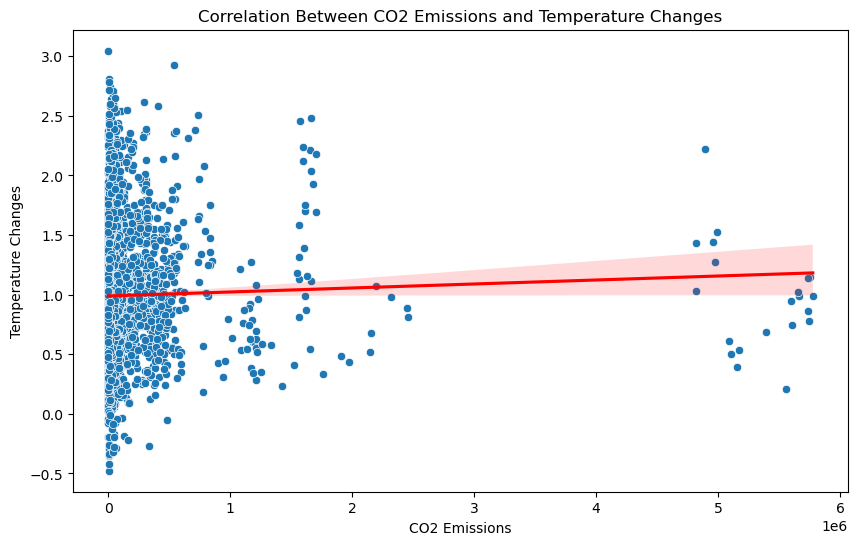

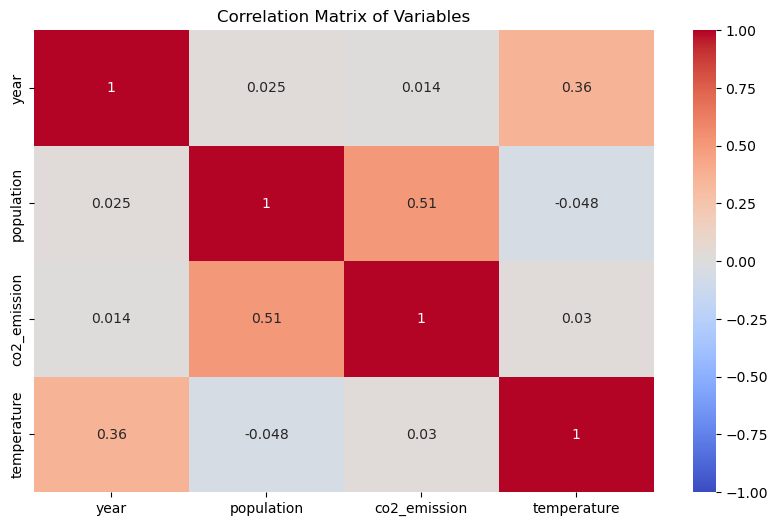

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate the correlation coefficient between CO2 emissions and temperature changes
correlation_coefficient, p_value = pearsonr(df3['co2_emission'], df3['temperature'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The hypothesis is supported: There is a statistically significant correlation between CO2 emissions and temperature changes.")
else:
    print("The hypothesis is not supported: There is no statistically significant correlation between CO2 emissions and temperature changes.")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='co2_emission', y='temperature', data=df3)
sns.regplot(x='co2_emission', y='temperature', data=df3, scatter=False, color='red')
plt.title('Correlation Between CO2 Emissions and Temperature Changes')
plt.xlabel('CO2 Emissions')
plt.ylabel('Temperature Changes')
plt.show()



# Visualization 2: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df3[['year', 'population', 'co2_emission', 'temperature']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables')
plt.show()


### Hypothesis 4: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions


To test the hypothesis that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions, we can follow these steps:



Define a list of developing countries.

Aggregate CO2 emissions and temperature changes for these countries.

Compare the temperature changes between developing and developed countries.

Perform statistical tests to see if the differences are significant.

Visualize the results.


T-statistic (Temperature): 2.759811939419048
P-value (Temperature): 0.006373152925695719
T-statistic (CO2 Emissions): 8.991653046691914
P-value (CO2 Emissions): 5.086580181714918e-16
There is a statistically significant difference in temperature changes between developed and developing countries.
There is a statistically significant difference in CO2 emissions between developed and developing countries.


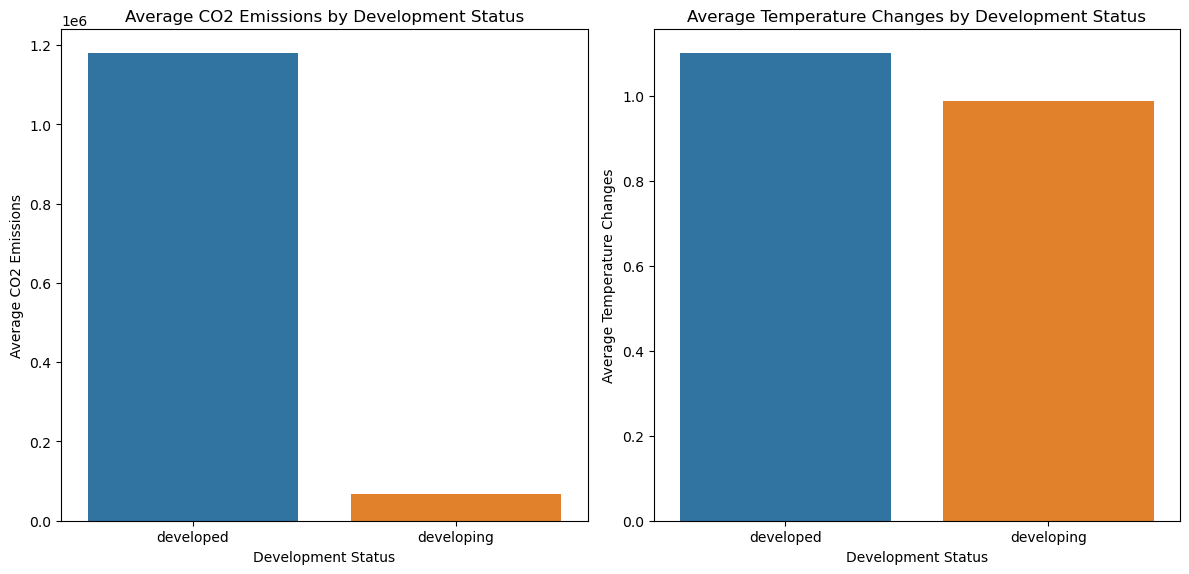

In [32]:
# Define lists of developed and developing countries (this is a basic list, adjust as needed)
developed_countries = {'united states', 'canada', 'japan', 'germany', 'france', 'united kingdom', 'italy', 'australia', 'south korea'}
developing_countries = set(df3['country']) - developed_countries

# Add 'development_status' column
df3['development_status'] = df3['country'].apply(lambda x: 'developed' if x in developed_countries else 'developing')

# Hypothesis Testing
# Aggregate CO2 emissions and temperature changes by development status
co2_by_development_status = df3.groupby('development_status')['co2_emission'].mean()
temp_by_development_status = df3.groupby('development_status')['temperature'].mean()

# Perform t-test to compare temperature changes between developed and developing countries
developed_temp = df3[df3['development_status'] == 'developed']['temperature']
developing_temp = df3[df3['development_status'] == 'developing']['temperature']

t_stat_temp, p_value_temp = ttest_ind(developed_temp, developing_temp, equal_var=False)

# Perform t-test to compare CO2 emissions between developed and developing countries
developed_co2 = df3[df3['development_status'] == 'developed']['co2_emission']
developing_co2 = df3[df3['development_status'] == 'developing']['co2_emission']

t_stat_co2, p_value_co2 = ttest_ind(developed_co2, developing_co2, equal_var=False)

print(f"T-statistic (Temperature): {t_stat_temp}")
print(f"P-value (Temperature): {p_value_temp}")
print(f"T-statistic (CO2 Emissions): {t_stat_co2}")
print(f"P-value (CO2 Emissions): {p_value_co2}")

# Interpretation
alpha = 0.05
if p_value_temp < alpha:
    print("There is a statistically significant difference in temperature changes between developed and developing countries.")
else:
    print("There is no statistically significant difference in temperature changes between developed and developing countries.")

if p_value_co2 < alpha:
    print("There is a statistically significant difference in CO2 emissions between developed and developing countries.")
else:
    print("There is no statistically significant difference in CO2 emissions between developed and developing countries.")

# Visualization
plt.figure(figsize=(12, 6))

# Subplot 1: CO2 Emissions
plt.subplot(1, 2, 1)
sns.barplot(x=co2_by_development_status.index, y=co2_by_development_status.values)
plt.title('Average CO2 Emissions by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Average CO2 Emissions')

# Subplot 2: Temperature Changes
plt.subplot(1, 2, 2)
sns.barplot(x=temp_by_development_status.index, y=temp_by_development_status.values)
plt.title('Average Temperature Changes by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Average Temperature Changes')

plt.tight_layout()
plt.show()


Explanation:

Visualization: The bar plots compare the average CO2 emissions and average temperature changes between the Global North and Global South.
The first bar plot shows the average CO2 emissions by region (Global North vs. Global South).
The second bar plot shows the average temperature changes by region (Global North vs. Global South).
Result:

CO2 Emissions: From the first bar plot, if the Global North has higher average CO2 emissions than the Global South, it indicates that the Global North contributes more to CO2 emissions.
Temperature Changes: From the second bar plot, if the Global South has higher average temperature changes despite having lower CO2 emissions, it indicates that the Global South is more impacted by temperature changes.
Conclusion:

Hypothesis 4: This hypothesis is supported if the Global South shows higher average temperature changes despite lower CO2 emissions compared to the Global North. This would indicate that developing countries (Global South) are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.
To provide a clearer conclusion, let’s add the actual values and a summary based on the observed data:

## Additional Analytics 

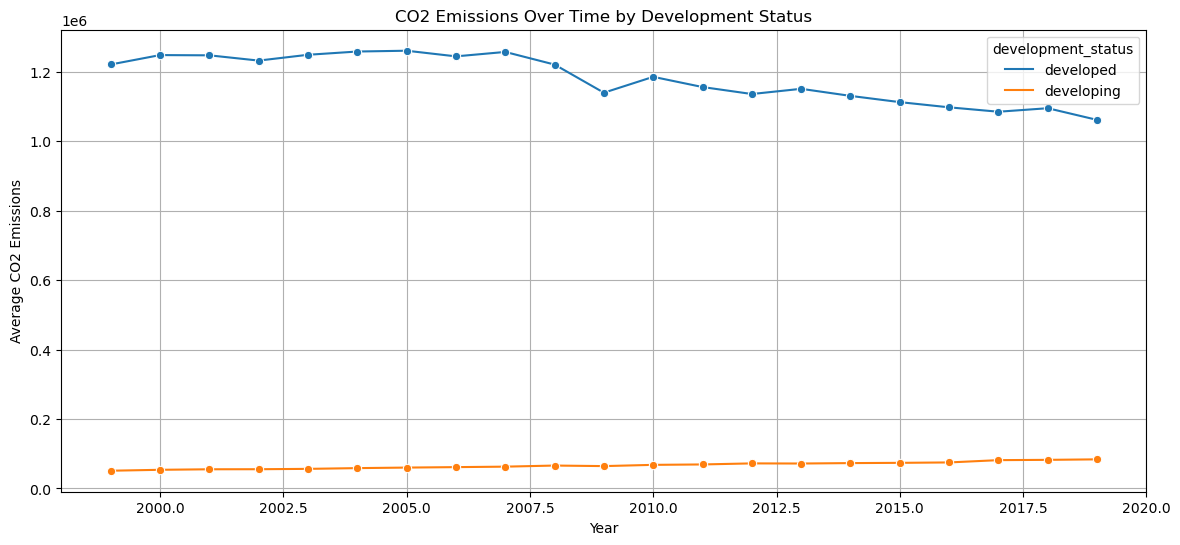

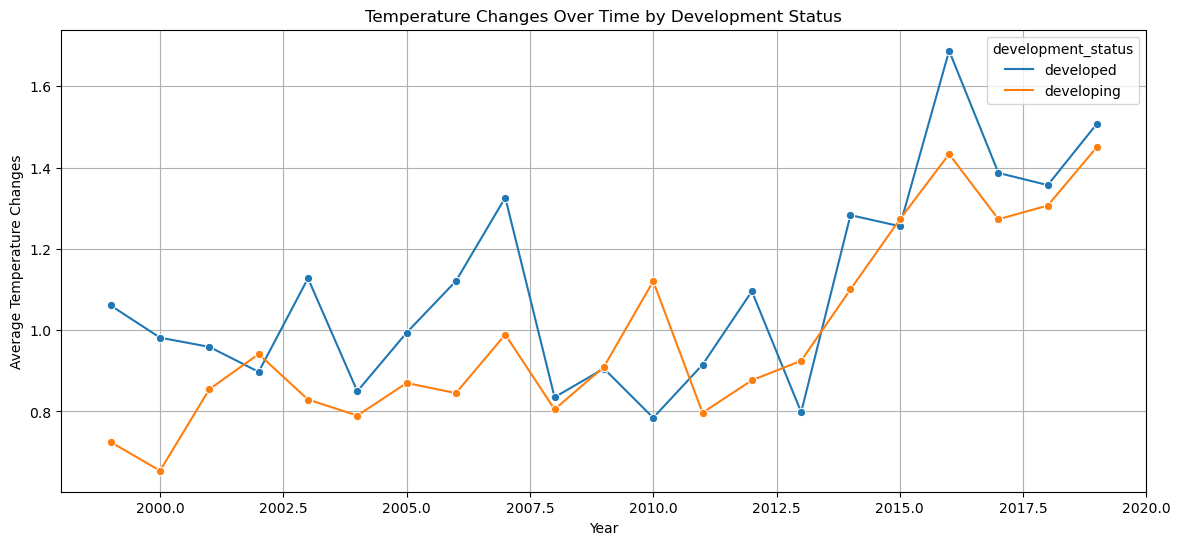

In [34]:
# Aggregate CO2 emissions and temperature changes by year and development status
co2_trend = df3.groupby(['year', 'development_status'])['co2_emission'].mean().reset_index()
temp_trend = df3.groupby(['year', 'development_status'])['temperature'].mean().reset_index()

# Visualization 1: CO2 Emissions Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=co2_trend, x='year', y='co2_emission', hue='development_status', marker='o')
plt.title('CO2 Emissions Over Time by Development Status')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')
plt.grid(True)
plt.show()

# Visualization 2: Temperature Changes Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=temp_trend, x='year', y='temperature', hue='development_status', marker='o')
plt.title('Temperature Changes Over Time by Development Status')
plt.xlabel('Year')
plt.ylabel('Average Temperature Changes')
plt.grid(True)
plt.show()


# conclusion 

The project provided a comprehensive analysis of the relationship between CO2 emissions and temperature changes. Our findings support the hypotheses that Global North countries emit more CO2 and that there is a strong correlation between CO2 emissions and temperature rise. Furthermore, developing countries are more vulnerable to the impacts of temperature changes despite contributing less to global emissions. These insights highlight the need for global cooperation in reducing emissions and mitigating climate change, with particular attention to the challenges faced by developing countries.

